In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("test.csv")

In [5]:
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,1076.0,4.18,1.0,0,0,13.500,0,0
1,429.0,1.48,4.0,0,0,13.500,0,0
2,856.0,4.15,1.0,0,24,6.000,0,0
3,622.0,3.22,1.0,0,15,5.625,0,0
4,507.0,3.98,1.0,0,0,2.250,0,0


In [7]:
df.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

In [9]:
df.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,89861.000000,89861.000000,89861.000000,89861.0,89861.000000,89861.000000,89861.0,89861.000000
mean,1148.178164,7.263529,1.286732,0.0,13.031048,15.190636,0.0,0.282280
std,4611.480867,554.965869,0.920910,0.0,18.692751,12.677904,0.0,0.450112
min,0.000000,0.020000,0.000000,0.0,0.000000,-0.500000,0.0,0.000000
25%,446.000000,1.950000,1.000000,0.0,0.000000,6.000000,0.0,0.000000
50%,705.000000,3.200000,1.000000,0.0,9.000000,9.750000,0.0,0.000000
75%,1094.000000,5.730000,1.000000,0.0,20.000000,26.450000,0.0,1.000000
max,86395.000000,145517.600000,9.000000,0.0,719.000000,431.500000,0.0,1.000000


In [11]:
df.mode()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,613.0,2.25,1.0,0,0,6.0,0,0


In [13]:
df.median()

trip_duration         705.00
distance_traveled       3.20
num_of_passengers       1.00
fare                    0.00
tip                     9.00
miscellaneous_fees      9.75
total_fare              0.00
surge_applied           0.00
dtype: float64

<Axes: >

C:\Users\intel i-5\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\intel i-5\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


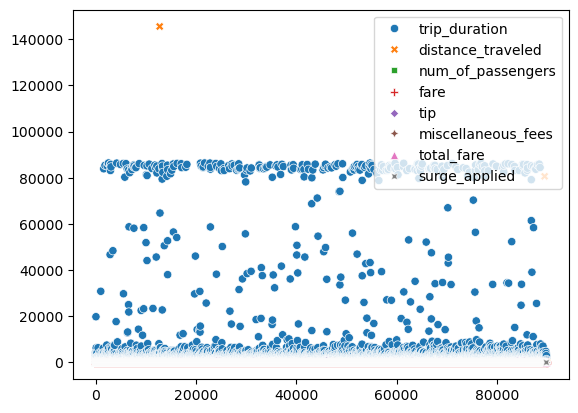

In [15]:
sns.scatterplot(data = df)

In [15]:
df.corr()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
trip_duration,1.000000,0.002006,0.004120,NaN,0.033548,0.044169,NaN,0.033250
distance_traveled,0.002006,1.000000,-0.001308,NaN,0.004232,0.017527,NaN,0.008763
num_of_passengers,0.004120,-0.001308,1.000000,NaN,0.002696,0.008706,NaN,0.004746
fare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tip,0.033548,0.004232,0.002696,NaN,1.000000,0.354386,NaN,0.258787
miscellaneous_fees,0.044169,0.017527,0.008706,NaN,0.354386,1.000000,NaN,0.707361
total_fare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
surge_applied,0.033250,0.008763,0.004746,NaN,0.258787,0.707361,NaN,1.000000


In [17]:
df.cov()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
trip_duration,2.126576e+07,5134.620201,17.495264,0.0,2891.873680,2582.317611,0.0,69.016945
distance_traveled,5.134620e+03,307987.115276,-0.668317,0.0,43.899241,123.313921,0.0,2.189010
num_of_passengers,1.749526e+01,-0.668317,0.848076,0.0,0.046417,0.101643,0.0,0.001967
fare,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
tip,2.891874e+03,43.899241,0.046417,0.0,349.418956,83.984043,0.0,2.177392
miscellaneous_fees,2.582318e+03,123.313921,0.101643,0.0,83.984043,160.729246,0.0,4.036535
total_fare,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
surge_applied,6.901695e+01,2.189010,0.001967,0.0,2.177392,4.036535,0.0,0.202600


In [19]:
df[['total_fare', 'fare']].describe()

,total_fare,fare
count,89861.0,89861.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


In [21]:
df.drop(columns=["total_fare","fare"], inplace = True)

In [23]:
df

,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees,surge_applied
0,1076.0,4.18,1.0,0,13.500,0
1,429.0,1.48,4.0,0,13.500,0
2,856.0,4.15,1.0,24,6.000,0
3,622.0,3.22,1.0,15,5.625,0
4,507.0,3.98,1.0,0,2.250,0
...,...,...,...,...,...,...
89856,435.0,2.24,1.0,13,13.700,0
89857,519.0,2.61,1.0,7,13.850,0
89858,450.0,2.24,1.0,0,26.625,1
89859,919.0,4.12,1.0,25,30.200,1


In [25]:
df.corr()

,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees,surge_applied
trip_duration,1.000000,0.002006,0.004120,0.033548,0.044169,0.033250
distance_traveled,0.002006,1.000000,-0.001308,0.004232,0.017527,0.008763
num_of_passengers,0.004120,-0.001308,1.000000,0.002696,0.008706,0.004746
tip,0.033548,0.004232,0.002696,1.000000,0.354386,0.258787
miscellaneous_fees,0.044169,0.017527,0.008706,0.354386,1.000000,0.707361
surge_applied,0.033250,0.008763,0.004746,0.258787,0.707361,1.000000


<Axes: >

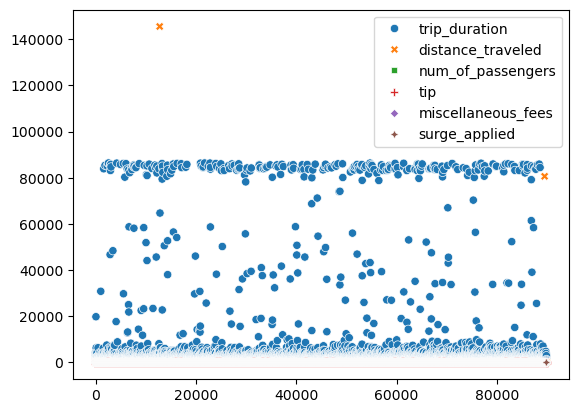

In [22]:
sns.scatterplot(data=df)

In [27]:
X = df[['trip_duration','distance_traveled','num_of_passengers','tip','miscellaneous_fees']]
y = df['surge_applied']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train

,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees
32395,2194.0,5.31,1.0,51,6.000
82815,2739.0,23.93,1.0,0,51.375
77125,124.0,0.32,1.0,0,13.500
55503,853.0,3.27,1.0,18,13.950
23894,597.0,7.53,1.0,0,9.750
...,...,...,...,...,...
6265,937.0,4.51,1.0,21,13.950
54886,944.0,4.31,1.0,25,33.950
76820,606.0,2.70,1.0,0,6.000
860,547.0,2.57,0.0,16,6.500


In [33]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\intel i-5\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
y_pred = lr.predict(X_test)

In [37]:
y_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(f"r-squared: {r2}")

r-squared: 0.8930984289598162


In [45]:
confusion_matrix(y_test, y_pred)

array([[12598,   371],
       [   15,  4989]], dtype=int64)

In [57]:
accuracy_score(y_test, y_pred)

0.9785233405664051

In [59]:
from sklearn.metrics import mean_squared_error

In [63]:
mean_squared_error(y_test, y_pred)

0.021476659433594836

In [69]:
from sklearn.metrics import mean_absolute_error

In [71]:
mean_absolute_error(y_test, y_pred)

0.021476659433594836

In [73]:
from sklearn.metrics import root_mean_squared_error

In [77]:
root_mean_squared_error(y_test, y_pred)

0.14654917070251486

C:\Users\intel i-5\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='l1', solver='saga')